# Importing data and checking the values overall

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from scipy.stats import chi2_contingency
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder



# df=pd.read_csv('train.csv')

import warnings
warnings.filterwarnings("ignore")

Importing and concatting both dataframes

In [46]:
# Setting data paths
train_data_path = "./data/train.csv"
test_data_path = "./data/test.csv"

# Reading CSV files
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

# Creating column to differentiate df_test and df_train
df_train['train_dummy'] = 1
df_test['train_dummy'] = 0

# Merging dataframes
df = pd.concat([df_train, df_test], axis=0).sort_values("id").reset_index()

In [47]:

# Set display option to avoid scientific notation and limit decimals
pd.set_option('display.float_format', lambda x: '{:.1f}'.format(x) if x % 1 else '{:.0f}'.format(x))

def calculate_column_statistics_for_numeric_variables(df):
    # Filter columns with numeric (int or float) data types
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns

    # Get all column names
    all_columns = df.columns
    total_columns = len(all_columns)

    num_numeric_columns = len(numeric_columns)

    # Find columns with categorical values
    categorical_columns = [col for col in all_columns if df[col].dtype == 'object']

    print(f"Total number of columns: {total_columns}")
    print(f"Number of numeric columns (int or float): {num_numeric_columns}")

    # Create a dictionary to store statistics
    stats_dict = {
        'Variable': numeric_columns,
        'Mean': [],
        'Mode': [],
        'Median': [],
        'Standard Deviation': [],
        'Minimum': [],
        'Maximum': [],
        'Count': [],
        'IQR': [],
        'Skewness': [],
        'Range': []
    }

    for column in numeric_columns:
        mean = df[column].mean()
        mode = statistics.mode(df[column].dropna())  # Handle potential multiple modes
        median = df[column].median()
        std_dev = df[column].std()
        min_val = df[column].min()
        max_val = df[column].max()
        count = df[column].count()
        iqr = np.percentile(df[column].dropna(), 75) - np.percentile(df[column].dropna(), 25)
        skew = df[column].skew()
        column_range = max_val - min_val

        stats_dict['Mean'].append(mean)
        stats_dict['Mode'].append(mode)
        stats_dict['Median'].append(median)
        stats_dict['Standard Deviation'].append(std_dev)
        stats_dict['Minimum'].append(min_val)
        stats_dict['Maximum'].append(max_val)
        stats_dict['Count'].append(count)
        stats_dict['IQR'].append(iqr)
        stats_dict['Skewness'].append(skew)
        stats_dict['Range'].append(column_range)

    # Create a DataFrame from the dictionary
    stats_df = pd.DataFrame(stats_dict)

    return stats_df


calculate_column_statistics_for_numeric_variables(df)

Total number of columns: 72
Number of numeric columns (int or float): 58


,Variable,Mean,Mode,Median,Standard Deviation,Minimum,Maximum,Count,IQR,Skewness,Range
0,index,3140.3,253,3063.5,2101.5,0,6894,7662,3830.5,0.1,6894
1,id,223616.3,41,228152.5,26710.5,41,264481,7662,34871.2,-1.5,264440
2,overall,68.8,67,68,6.0,48,93,7662,7,0.4,45
3,potential,72.0,72,72,6.1,53,95,7662,8,0.3,42
4,value_eur,4331452.9,1200000,1400000,10450193.9,25000,194000000,7657,2275000,6.4,193975000
5,wage_eur,12030.3,2000,4000,24385.9,500,350000,7662,10000,5.8,349500
6,height_cm,181.5,180,182,6.9,156,203,7662,9,-0.1,47
7,weight_kg,75.6,70,75,7.0,53,103,7662,10,0.2,50
8,league_level,1.4,1,1,0.8,1,5,7662,0,2.2,4
9,club_jersey_number,16.5,10,13,15.5,1,99,7662,16,2.6,98


In [48]:
#I want to create a function that creates a dataframe that gives me the categorical variables, the number of unique values, and the top 5 most frequent values. I want to be able to use this function on any dataframe that I have. I have tried the following code but it does not work. I am not sure how to fix it. I am new to python and pandas so any help would be appreciated. Thank you!

def calculate_column_statistics_for_categorical_variables(df):
    # Filter columns with categorical data types
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Get all column names
    all_columns = df.columns
    total_columns = len(all_columns)

    num_categorical_columns = len(categorical_columns)

    # Find columns with numeric values
    numeric_columns = [col for col in all_columns if df[col].dtype == 'int' or df[col].dtype == 'float']

    print(f"Total number of columns: {total_columns}")
    print(f"Number of categorical columns: {num_categorical_columns}")

    # Set the max_colwidth option to control the width of the displayed column
    pd.set_option('max_colwidth', 100)  # Adjust the width as needed

    # Create a dictionary to store statistics
    stats_dict = {
        'Variable': categorical_columns,
        'Number of Unique Values': [],
        'Top 5 Most Frequent Values': []
    }

    for column in categorical_columns:
        num_unique_values = df[column].nunique()
        top_5_frequent_values = df[column].value_counts().index[:5].tolist()  # Get the top 5 values as a list

        stats_dict['Number of Unique Values'].append(num_unique_values)
        stats_dict['Top 5 Most Frequent Values'].append(top_5_frequent_values)

    # Create a DataFrame from the dictionary
    stats_df = pd.DataFrame(stats_dict)

    # Sort the DataFrame downward by the number of unique values
    stats_df = stats_df.sort_values(by='Number of Unique Values', ascending=False)
    stats_df = stats_df.reset_index(drop=True)

    return stats_df

calculate_column_statistics_for_categorical_variables(df)

Total number of columns: 72
Number of categorical columns: 14


,Variable,Number of Unique Values,Top 5 Most Frequent Values
0,short_name,7418,"[J. Rodríguez, J. Brown, M. Camara, L. Rodríguez, Danilo]"
1,birthday_date,4214,"[1992-02-29, 1996-02-29, 2000-02-29, 1988-02-29, 1991-01-08]"
2,club_joined,1331,"[2021-07-01, 2019-07-01, 2018-07-01, 2017-07-01, 2020-07-01]"
3,player_traits,825,"[Speed Dribbler (AI), Power Header, Dives Into Tackles (AI), Long Passer (AI), Long Shot Taker (..."
4,club_name,701,"[Vissel Kobe, Philadelphia Union, Sanfrecce Hiroshima, Seattle Sounders FC, Bengaluru FC]"
5,club_loaned_from,207,"[Racing Club, Manchester United, Watford, Wolverhampton Wanderers, Chelsea]"
6,nationality_name,144,"[England, Brazil, Germany, Spain, Argentina]"
7,player_tags,64,"[#Strength, #Engine, #Acrobat, #Speedster, #Aerial Threat, #Strength]"
8,league_name,55,"[USA Major League Soccer, Argentina Primera División, English League Championship, English Leagu..."
9,position,24,"[LCB, RCB, GK, RB, LB]"


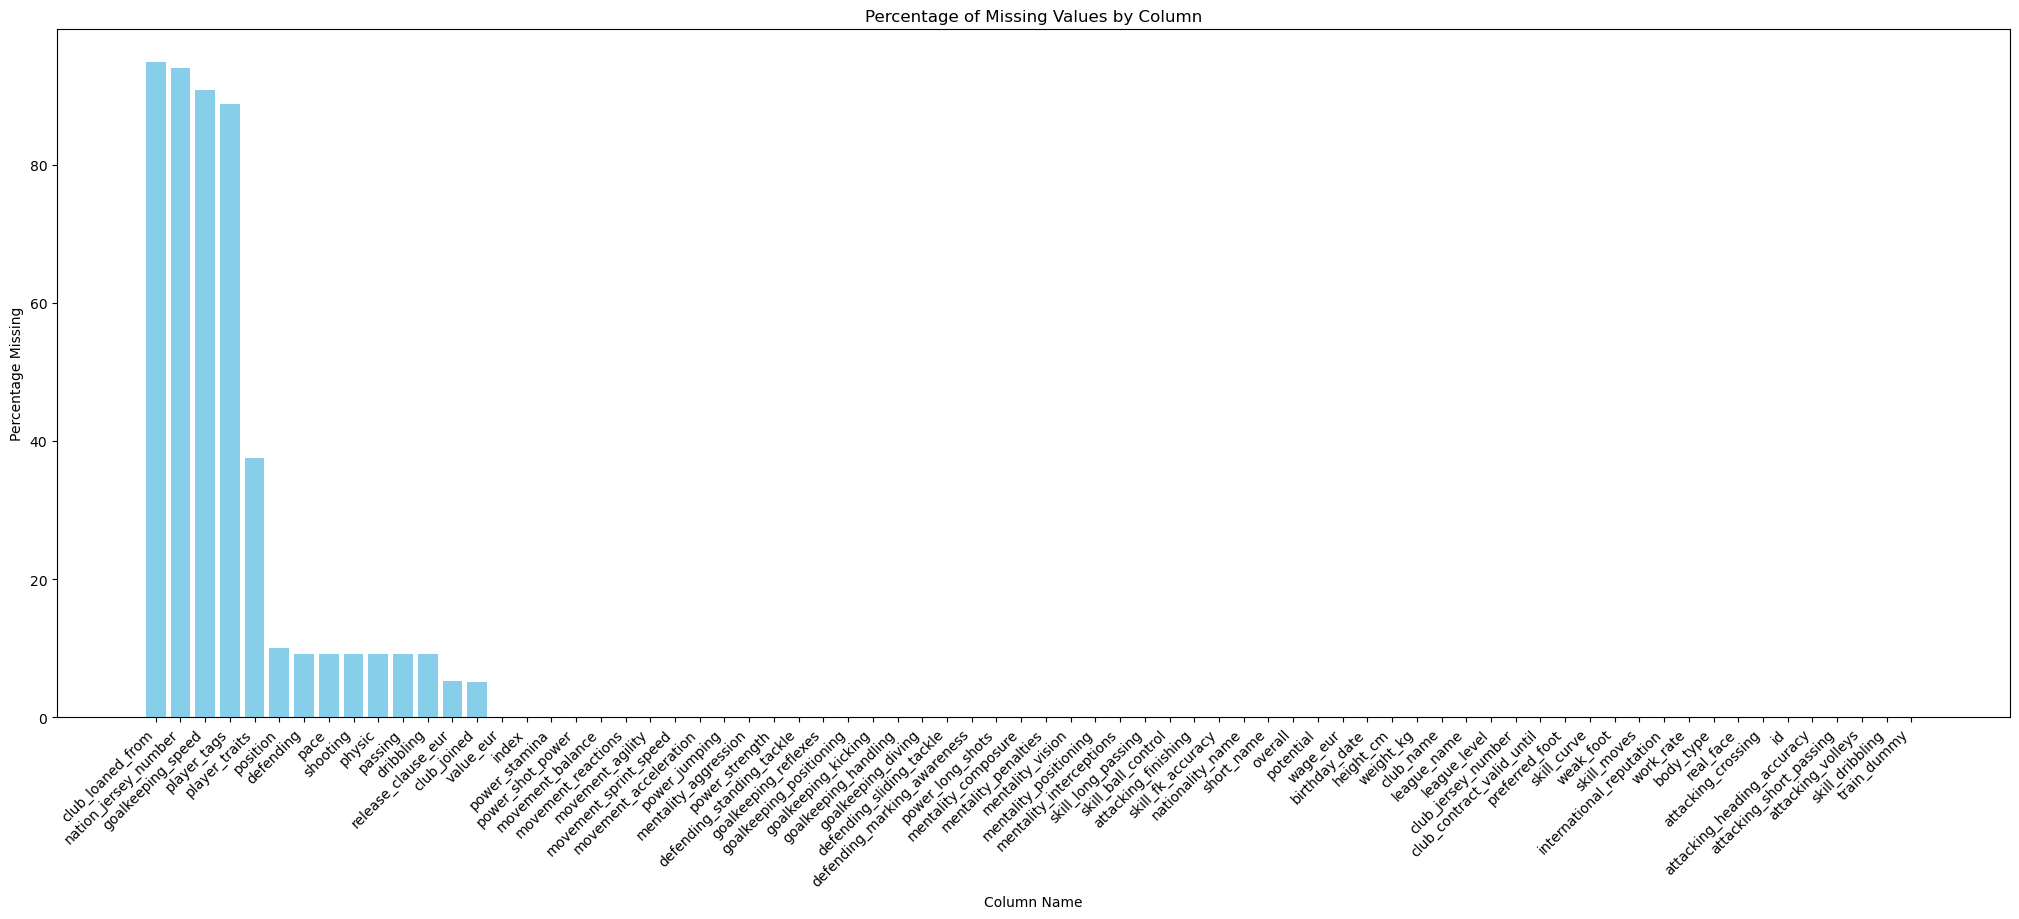


Columns with Missing Values (Descending Order):
club_loaned_from: 94.83% (Categorical)
nation_jersey_number: 93.94% (Numerical)
goalkeeping_speed: 90.85% (Numerical)
player_tags: 88.83% (Categorical)
player_traits: 37.51% (Categorical)
position: 10.01% (Categorical)
defending: 9.15% (Numerical)
pace: 9.15% (Numerical)
shooting: 9.15% (Numerical)
physic: 9.15% (Numerical)
passing: 9.15% (Numerical)
dribbling: 9.15% (Numerical)
release_clause_eur: 5.23% (Numerical)
club_joined: 5.17% (Categorical)
value_eur: 0.07% (Numerical)


In [49]:
def calculate_missing_info_print_only(df):
    # Calculate the percentage of missing values in each column
    missing_percentages_df = (df.isnull().mean() * 100).round(2).reset_index()
    missing_percentages_df.columns = ['Column Name', 'Percentage Missing']

    # Sort the DataFrame by 'Percentage Missing' in descending order
    missing_percentages_df = missing_percentages_df.sort_values(by='Percentage Missing', ascending=False)

    # Classify columns as numerical or categorical
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    missing_percentages_df['Column Type'] = missing_percentages_df['Column Name'].apply(
        lambda x: 'Numerical' if x in numerical_columns else 'Categorical'
    )

    # Display a bar chart of missing values with increased space between bars
    plt.figure(figsize=(20, 9))
    plt.bar(missing_percentages_df['Column Name'], missing_percentages_df['Percentage Missing'], color='skyblue')
    plt.xlabel('Column Name')
    plt.ylabel('Percentage Missing')
    plt.title('Percentage of Missing Values by Column')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout(pad=0.0001)  # Adjust the padding between bars
    plt.show()

    # Print column names, missing percentages, and column types for columns with missing values higher than 0%
    print("\nColumns with Missing Values (Descending Order):")
    for index, row in missing_percentages_df.iterrows():
        if row['Percentage Missing'] > 0:
            print(f"{row['Column Name']}: {row['Percentage Missing']}% ({row['Column Type']})")

# Example usage with the existing DataFrame 'df'
calculate_missing_info_print_only(df)



Dealing with missing values.

Taking a looking at missing values, club_loaned_from, nation_jersey_number, club_joined are not relevant in terms of positioning. 

Observing the numerical values, goalkeeping_speed, defending, pace, shooting, passing, dribling, physic, it does not also make sense to fill them in any way, as they are caractheristics from the players themselves and there is a nice relation between them.

If you look at goalkepping_speed, you see that it is 90.85%. The other missing values are 9.15%, meaning that probably we have here a relation that the goalkeeping_speed misses in players which are not goalkeeps and the other ones miss in the ones that are goalkeepers.

Player_tags and player_traits might be useful. And we need to think about how to treat it.

Release Clause and value err may be collinear as they indicate pretty much the same information. Although value_eur is a variable that probably needs treatment.



# Dealing with missing values

Let's take a look first on goal_keeping speed to understand what is going on there.

We need to check two things: players with GoalKeeping speed are Goalkeepers and if there any goalkeepers without goalkeeping speed.

Our results says that the previous hyphothesis is confirmed. As a result, and to reduce the number of columns, we will create a Dummy-Variable for GK

In [50]:
# Filter the DataFrame for players with non-null 'goalkeeping_speed' values for the train data
players_with_gk_speed = df[(df['goalkeeping_speed'].notnull()) & (df['train_dummy'] == 1) ]

# Extracting the positions of these players
positions_of_players_with_gk_speed = players_with_gk_speed['position'].unique()

print(positions_of_players_with_gk_speed)

# Check for goalkeepers without 'goalkeeping_speed' values
gk_without_gk_speed = df[(df['position'] == 'GK') & (df['goalkeeping_speed'].isnull())]

gk_without_gk_speed_count = gk_without_gk_speed.shape[0]
print(gk_without_gk_speed_count)



['GK']
0


In [51]:
# Create a new column 'GK_Dummy' 
df['GK_Dummy'] =  pd.notna(df['goalkeeping_speed']).astype(int)

# drop columns for goal_keeping to reduce number of columns
columns_to_drop = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']	

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

Idea: Since we already know, that all players where 'GK_Dummy' = 1, maybe exclude these rows from further data analysis and the model and just impute the predictions manually

In [52]:
df_only_goalkeepers = df[df['GK_Dummy'] == 1]
df_only_goalkeepers

,index,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,...,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,position,train_dummy,GK_Dummy
1,3019,1179,G. Buffon,80,80,2300000,18000,1978-01-28,192,92,...,12,50,22,70,13,11,11,GK,1,1
2,3804,2147,M. Stekelenburg,76,76,825000,8000,1982-09-22,197,92,...,12,40,23,59,9,15,14,GK,1,1
5,3402,19541,G. Morris,64,64,60000,2000,1983-12-20,183,70,...,14,41,29,56,13,22,24,GK,1,1
9,253,24630,Pepe Reina,78,78,1600000,27000,1982-08-31,188,92,...,13,65,24,64,20,22,24,NaN,0,1
13,5686,49000,A. McGregor,77,77,1200000,23000,1982-01-31,183,74,...,13,61,23,68,15,13,15,GK,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7591,711,263023,N. Sauter,56,69,300000,500,2003-04-06,190,80,...,9,26,14,30,8,13,12,NaN,0,1
7594,4769,263032,V. Kovacević,68,75,2100000,2000,1998-04-11,192,81,...,4,55,11,56,8,13,12,GK,1,1
7599,416,263063,J. Trafford,59,77,500000,500,2002-10-10,191,78,...,7,22,16,26,5,13,13,GK,1,1
7614,1004,263232,Luiz Felipe,66,70,975000,1000,1997-04-24,198,90,...,4,37,10,26,7,10,14,GK,1,1


In [53]:
# drop these rows from the original df (put them back together later)

df_without_gk = df[~df['id'].isin(df_only_goalkeepers['id'])]

In [54]:
df_without_gk

,index,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,...,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,position,train_dummy,GK_Dummy
0,3175,41,Iniesta,79,79,5500000,10000,1984-05-11,171,68,...,78,90,71,89,68,53,50,CAM,1,0
3,5915,3467,Yuri,71,71,650000,5000,1982-08-08,186,78,...,74,59,73,71,41,22,19,LS,1,0
4,6813,18115,Rúben Fernandes,69,69,375000,4000,1986-05-06,187,81,...,40,52,67,70,73,69,67,LCB,1,0
6,1725,20775,Quaresma,77,77,3400000,10000,1983-09-26,175,68,...,73,83,73,82,29,17,11,RW,1,0
7,2224,20801,Cristiano Ronaldo,91,91,45000000,270000,1985-02-05,187,83,...,95,76,88,95,24,32,24,ST,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,4722,264104,W. Goodwin,61,75,775000,3000,2002-05-07,193,90,...,61,53,58,58,22,25,25,RS,1,0
7658,2663,264153,D. Mondonico,59,64,300000,2000,1997-05-25,193,85,...,30,45,37,52,58,67,64,CB,1,0
7659,1490,264348,S. Rahimi,73,76,4000000,1000,1996-06-02,181,76,...,73,73,67,68,35,34,30,LM,1,0
7660,6676,264465,Luvannor,69,69,1200000,12000,1990-05-19,182,77,...,71,65,62,75,30,29,34,RM,1,0


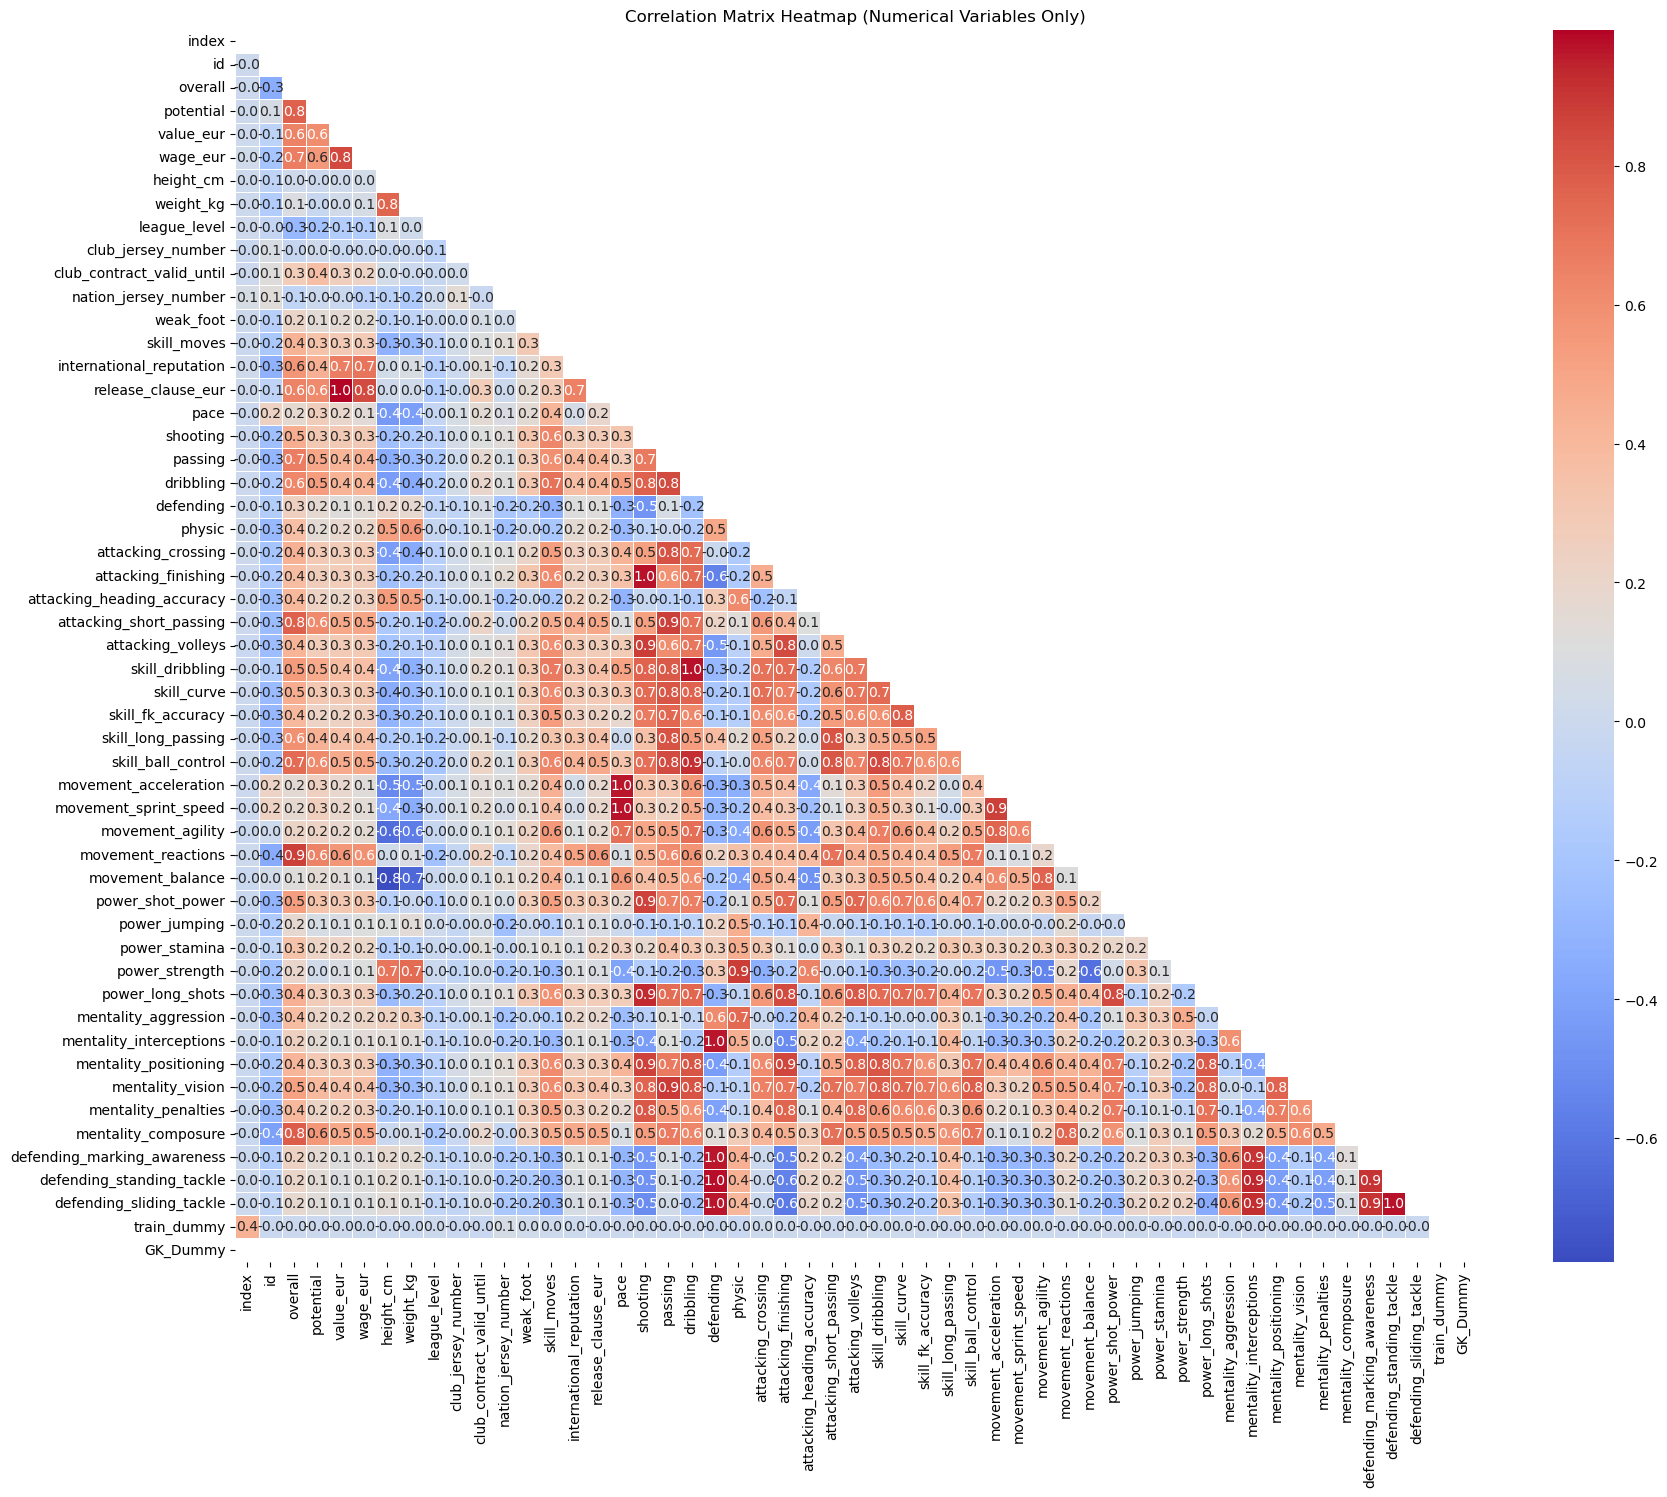

In [55]:
# Selecting numerical columns except those to be excluded
numerical_columns = [col for col in df_without_gk.select_dtypes(include='number').columns]

# Creating a new dataframe with only the selected numerical columns
selected_df = df_without_gk[numerical_columns]

# Correlation matrix 
correlation_matrix = selected_df.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(correlation_matrix)
# Create a heatmap
plt.figure(figsize=(20, 16)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5, mask=matrix)
plt.title("Correlation Matrix Heatmap (Numerical Variables Only)")
plt.show()

There are a lot of variables, that are perfectly correlated (dealing with them later):
- release_clause_eur and value_eur
- attacking_finishing and shooting
- skill_dribbling and dribbling
- movement_acceleration, movement_sprint_speed and pace
- mentality_interceptions, defending_making_awareness, defending_standing_tackle and defending_sliding_tackle

In order to select the variables to keep among the regressors that are highly correlated with each other, we create a numerical variable where a unique number is associated to each position. We then compute the level of correlation with the other variables. 

We then keep the variable that is more correlated to our target variable 'position' relative to the other one.

In [56]:
# Creating a function that creates a new columns with a number associated to every position in the variable position
def assign_numeric_positions(df, column_name):
    unique_positions = df[column_name].unique()
    position_mapping = {pos: num + 1 for num, pos in enumerate(unique_positions)}
    
    # append a new column with the numeric position
    df['position_num'] = df[column_name].map(position_mapping)
    
    return df

In [57]:
# Printing the variables with the highest correlation with the target variable using the df_train dataset
df_train = pd.read_csv('data/train.csv')
df_train.drop(['club_loaned_from', 'nation_jersey_number','player_tags','player_traits','goalkeeping_speed'], axis=1, inplace=True)

df_train = assign_numeric_positions(df_train, 'position')

#Computing a new correlation matrix
simplified_corr = df_train.corr()

# Select variables with correlation greater than 0.2 or less than -0.2
selected_variables = simplified_corr[(simplified_corr > 0.05) | (simplified_corr < -0.05)]
selected_variables = selected_variables["position_num"].dropna()
# Print the selected variables
print(selected_variables)

ValueError: could not convert string to float: 'E. García'

Based on the correlation level of the regressors with the target variable, we decide to **keep** the following variables that were initially suffering from multi-colinearity:

- attacking_finishing 
- skill_dribbling 
- movement_acceleration

In [58]:
# Dropping the variables responsible for multicollinearity (keeping only the ones with the highest correlation with the target variable)
columns_to_drop2 = ['release_clause_eur', 'value_eur', 'shooting', 'dribbling', 'movement_sprint_speed', 'pace','mentality_interceptions', 'defending_making_awareness', 'defending_standing_tackle', 'defending_sliding_tackle']	

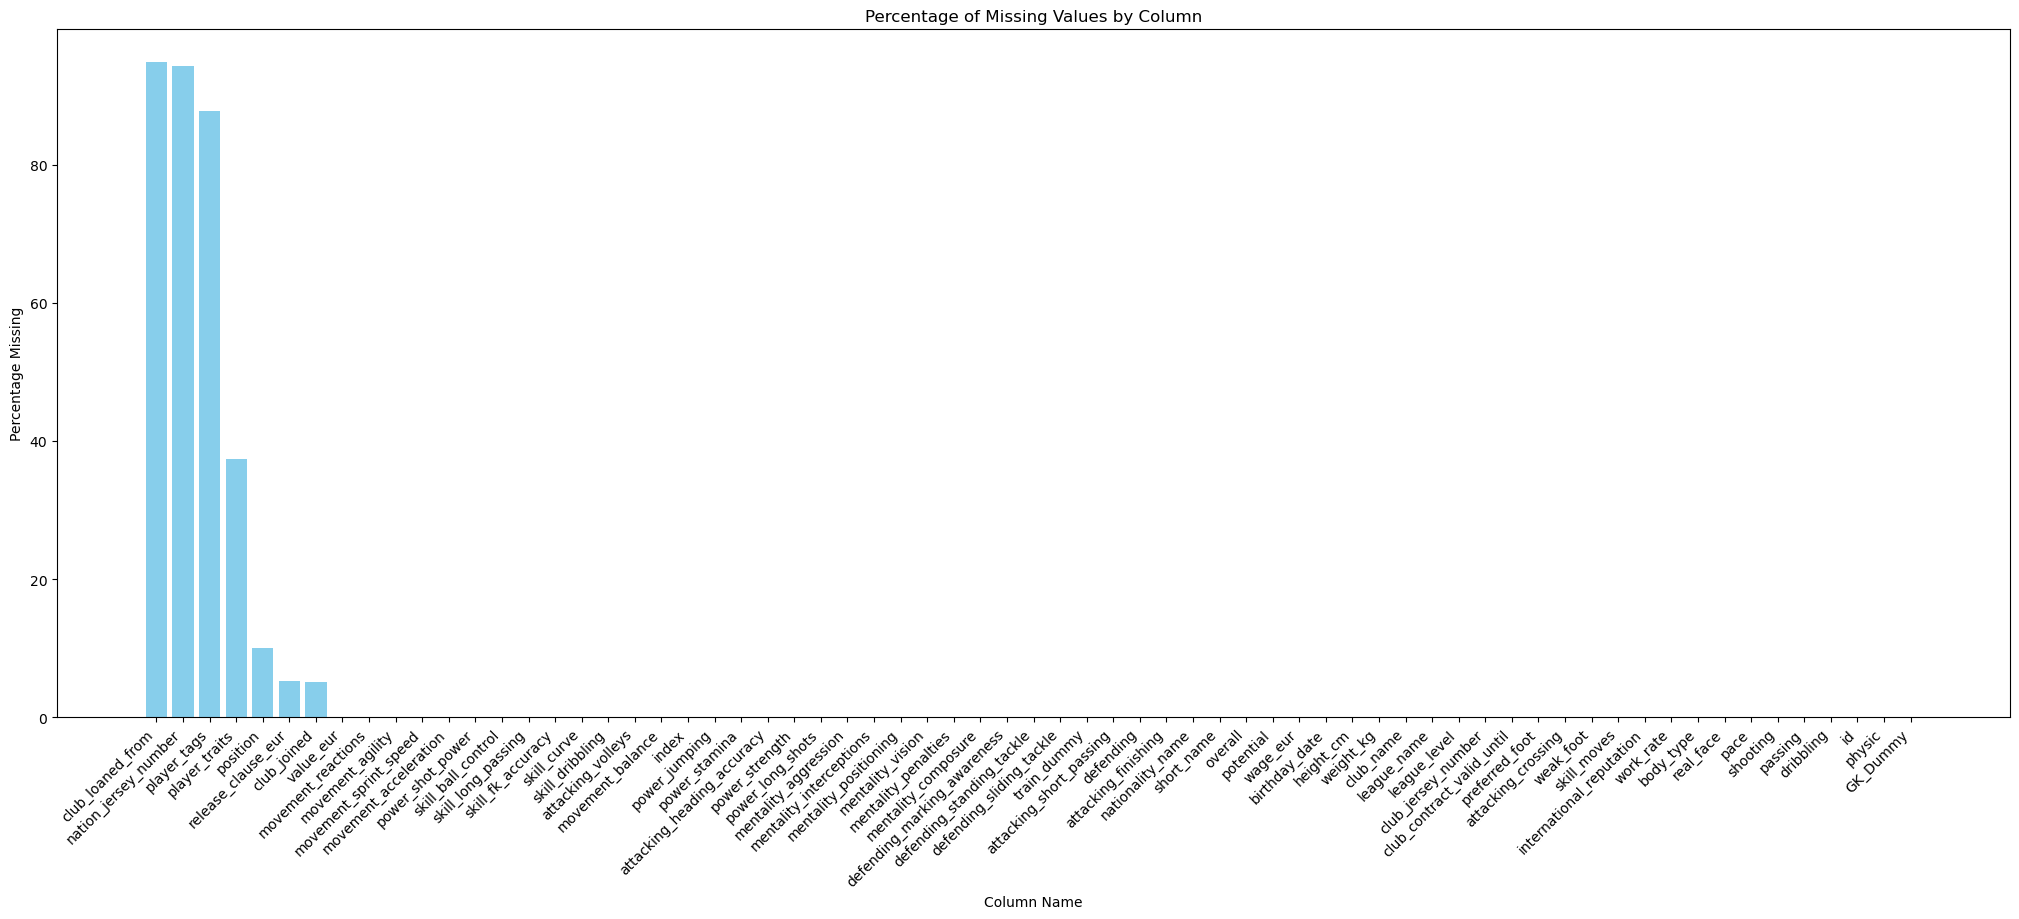


Columns with Missing Values (Descending Order):
club_loaned_from: 94.83% (Categorical)
nation_jersey_number: 94.27% (Numerical)
player_tags: 87.7% (Categorical)
player_traits: 37.37% (Categorical)
position: 10.01% (Categorical)
release_clause_eur: 5.24% (Numerical)
club_joined: 5.17% (Categorical)
value_eur: 0.07% (Numerical)


In [59]:
# def fill_selected_columns_hardcoded(df):
#     df_modified = df.copy()

#     # List of columns to fill with 0
#     columns_to_fill = ['goalkeeping_speed', 'defending', 'pace', 'shooting', 'physic', 'passing', 'dribbling']

#     # Filling missing values in the specified columns with 0
#     for column in columns_to_fill:
#         if column in df_modified.columns:
#             df_modified[column] = df_modified[column].fillna(0)

#     return df_modified

# df=fill_selected_columns_hardcoded(df)

# """Note, can we make sure that GK are directly attributed if goalkeeping_speed is 0?"""

calculate_missing_info_print_only(df_without_gk)


Now I wil drop club_loaned_from, nation_jersey_number and club_joined

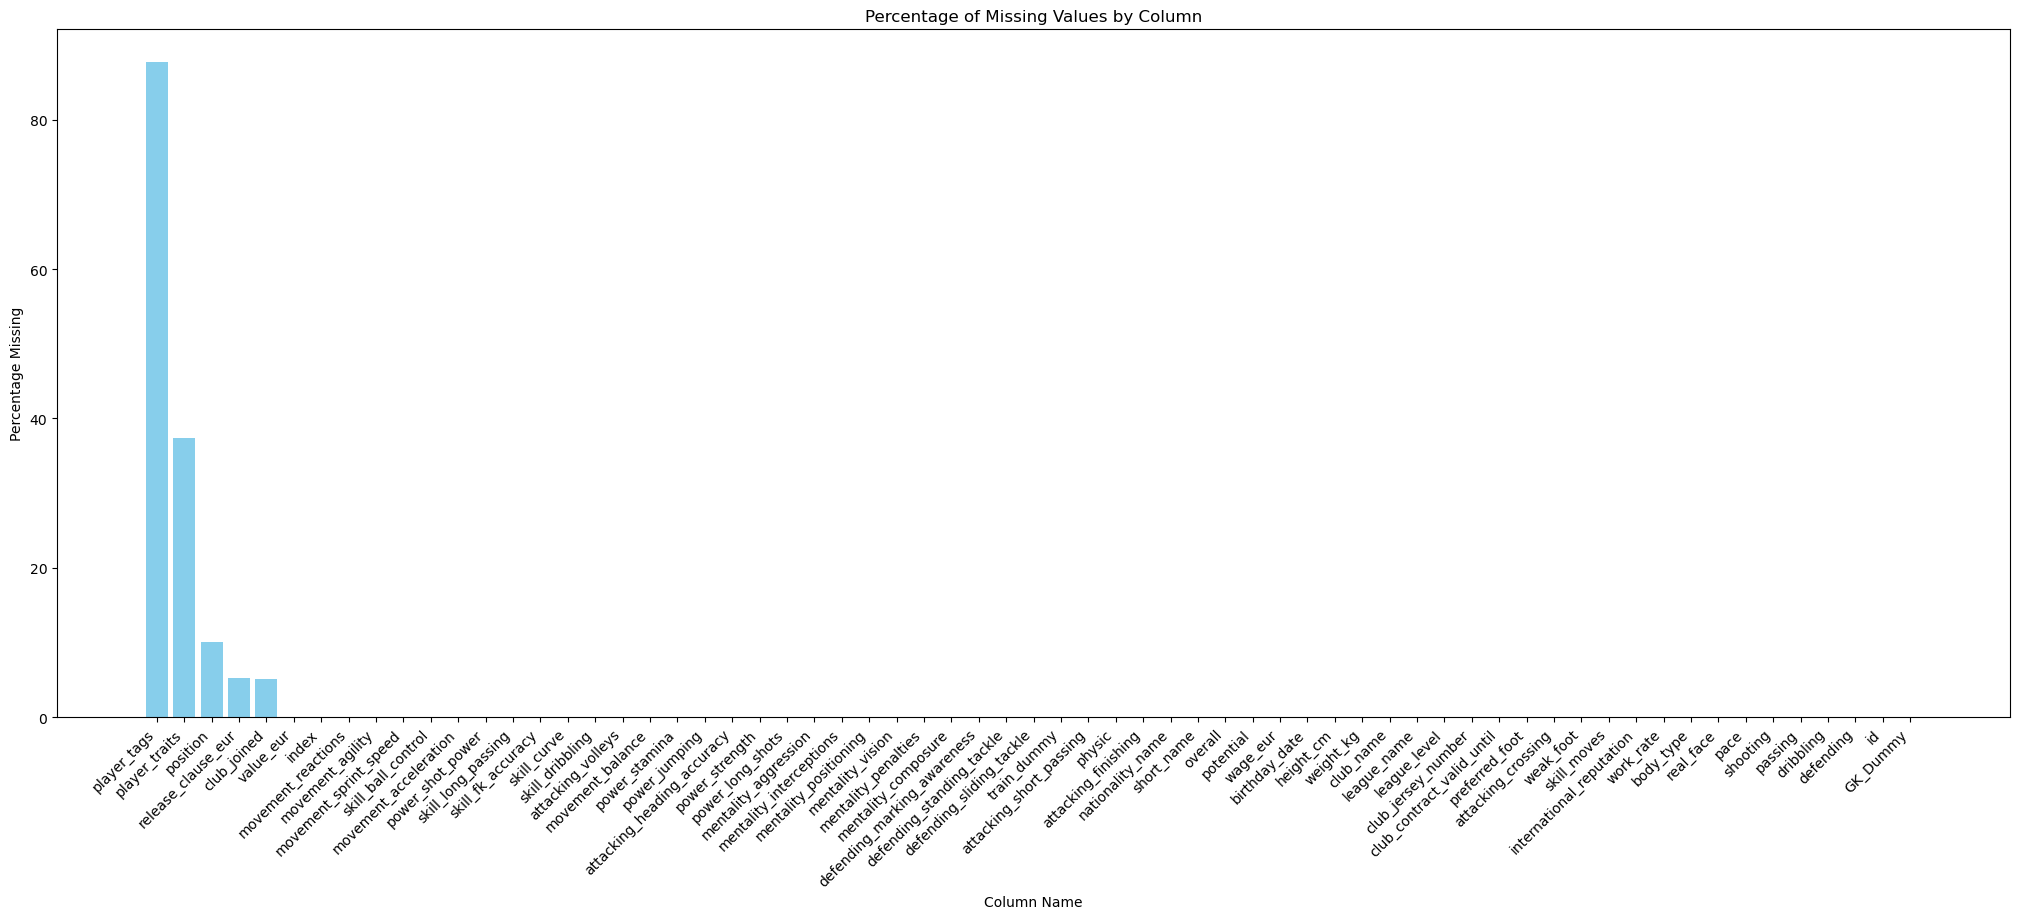


Columns with Missing Values (Descending Order):
player_tags: 87.7% (Categorical)
player_traits: 37.37% (Categorical)
position: 10.01% (Categorical)
release_clause_eur: 5.24% (Numerical)
club_joined: 5.17% (Categorical)
value_eur: 0.07% (Numerical)


In [60]:
def drop_columns(df):
    return df.drop(['club_loaned_from', 'nation_jersey_number'], axis=1)

df_without_gk=drop_columns(df_without_gk)

calculate_missing_info_print_only(df_without_gk)


Taking care of value_eur and release_clause_eur.

Release_clause_eur is correlated almost as 1 with value_eur. 
We just have 5 observations without value and they dont have release_clause_eur.





In [61]:
corr_release_value = df_without_gk[['release_clause_eur', 'value_eur']].corr()
corr_release_value

,release_clause_eur,value_eur
release_clause_eur,1,1.0
value_eur,1.0,1


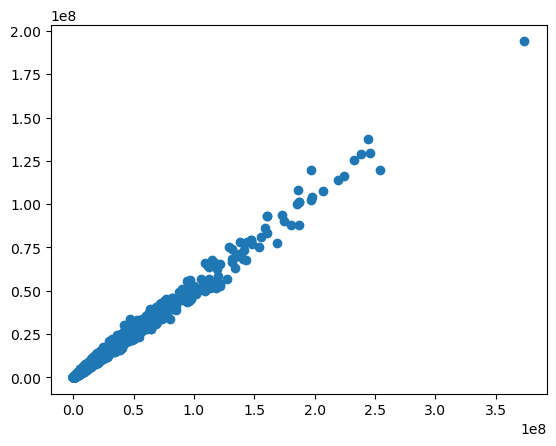

In [62]:
plt.scatter(df_without_gk['release_clause_eur'], df_without_gk['value_eur'])

In [21]:
print(df_without_gk['release_clause_eur'].mean())
print(df_without_gk['value_eur'].mean())

8240939.660400243
4373757.906843013


From the scatterplot and from the means you can see that both variables have nearly a 1 to 2 relationship. That is how we impute the missing values in value_eur

In [63]:
df_without_gk[(df_without_gk['value_eur'].isna()) & (df_without_gk['release_clause_eur'].isna())]

,index,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,...,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,position,train_dummy,GK_Dummy
26,10,115909,Rubén Castro,69,69,NaN,3000,1981-06-27,169,68,...,77,74,75,68,36,12,14,NaN,0,0
30,4001,124344,İ. Öztürk,67,67,NaN,3000,1981-06-21,186,80,...,34,44,51,51,70,68,62,CB,1,0
44,633,140222,P. Da Silva,67,67,NaN,500,1980-02-01,180,76,...,38,36,43,70,70,67,64,NaN,0,0
79,5599,152912,J. Sand,75,75,NaN,13000,1980-07-17,182,79,...,83,69,85,85,45,21,25,LS,1,0
115,147,158293,Zheng Zhi,67,67,NaN,5000,1980-08-20,180,75,...,63,72,68,72,69,64,62,NaN,0,0


SInce all rows with missing values in 'value_eur' also have missing values in 'release_clause_eur' it is not possible.

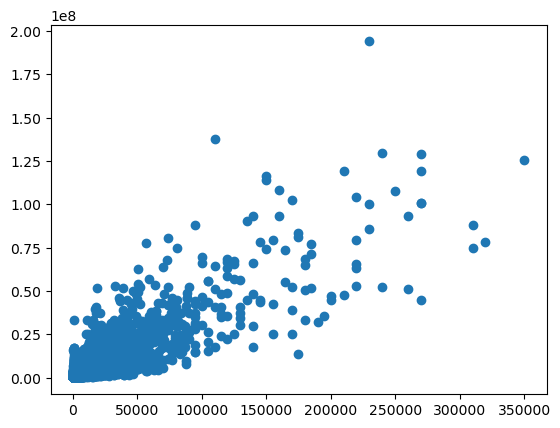

,wage_eur,value_eur
wage_eur,1,0.8
value_eur,0.8,1


In [64]:
plt.scatter(df_without_gk['wage_eur'], df_without_gk['value_eur'])
plt.show()

corr_wage = df_without_gk[['wage_eur', 'value_eur']].corr()
corr_wage

Also quite high correlation between those two

In [65]:
df_without_gk['wage_eur'].isna().sum()

0

We don't have missing values in 'wage_eur' and a stron correlation to 'value_eur' (0.8) and 'release_clause_eur' (0.8). As a result, instead of dealing with missing values in 'value_eur' and/or 'release_clause_eur' we drop these columns

In [66]:
columns_to_drop = ['value_eur', 'release_clause_eur']	

# Drop the specified columns
df_without_gk.drop(columns=columns_to_drop, inplace=True)

For the moment, I will put the KNN the value_eur and drop release_clause_eur.

In [114]:
# def fill_value_eur_with_knn_and_print_details_v2(df, target_column='value_eur', n_neighbors=5):
#     categorical_columns = ['club_name', 'league_name', 'preferred_foot']

#     # Selecting numeric columns for KNN imputation
#     numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
#     df_numeric = df[numeric_columns]

#     # Creating a temporary DataFrame with encoded categorical variables
#     df_temp = df.copy()
#     for col in categorical_columns:
#         if col in df_temp.columns:
#             encoder = OrdinalEncoder()
#             df_temp[col] = encoder.fit_transform(df_temp[[col]])

#     # Merging numeric and encoded categorical data for imputation
#     df_temp = pd.concat([df_numeric, df_temp[categorical_columns]], axis=1)

#     # KNN imputer
#     imputer = KNNImputer(n_neighbors=n_neighbors)
#     df_imputed = imputer.fit_transform(df_temp)
#     df_imputed = pd.DataFrame(df_imputed, columns=df_temp.columns)

#     # Identify the indices where 'value_eur' was originally missing
#     missing_value_indices = df[df[target_column].isnull()].index

#     # Update the target column in the original DataFrame with imputed values
#     df[target_column] = df_imputed[target_column]

#     # Print the detailed imputed values and the club's median values
#     for index in missing_value_indices:
#         player_name = df.at[index, 'short_name']
#         club_name = df.at[index, 'club_name']
#         imputed_value = df_imputed.at[index, target_column]
#         club_median_value = df.groupby('club_name')[target_column].median().loc[club_name]
#         print(f"{player_name} has been filled with {imputed_value}. He plays for {club_name}, where the median wage is {club_median_value}.")

#     return df

# # Applying the function to the DataFrame
# df_filled_with_details_v2 = fill_value_eur_with_knn_and_print_details_v2(df)


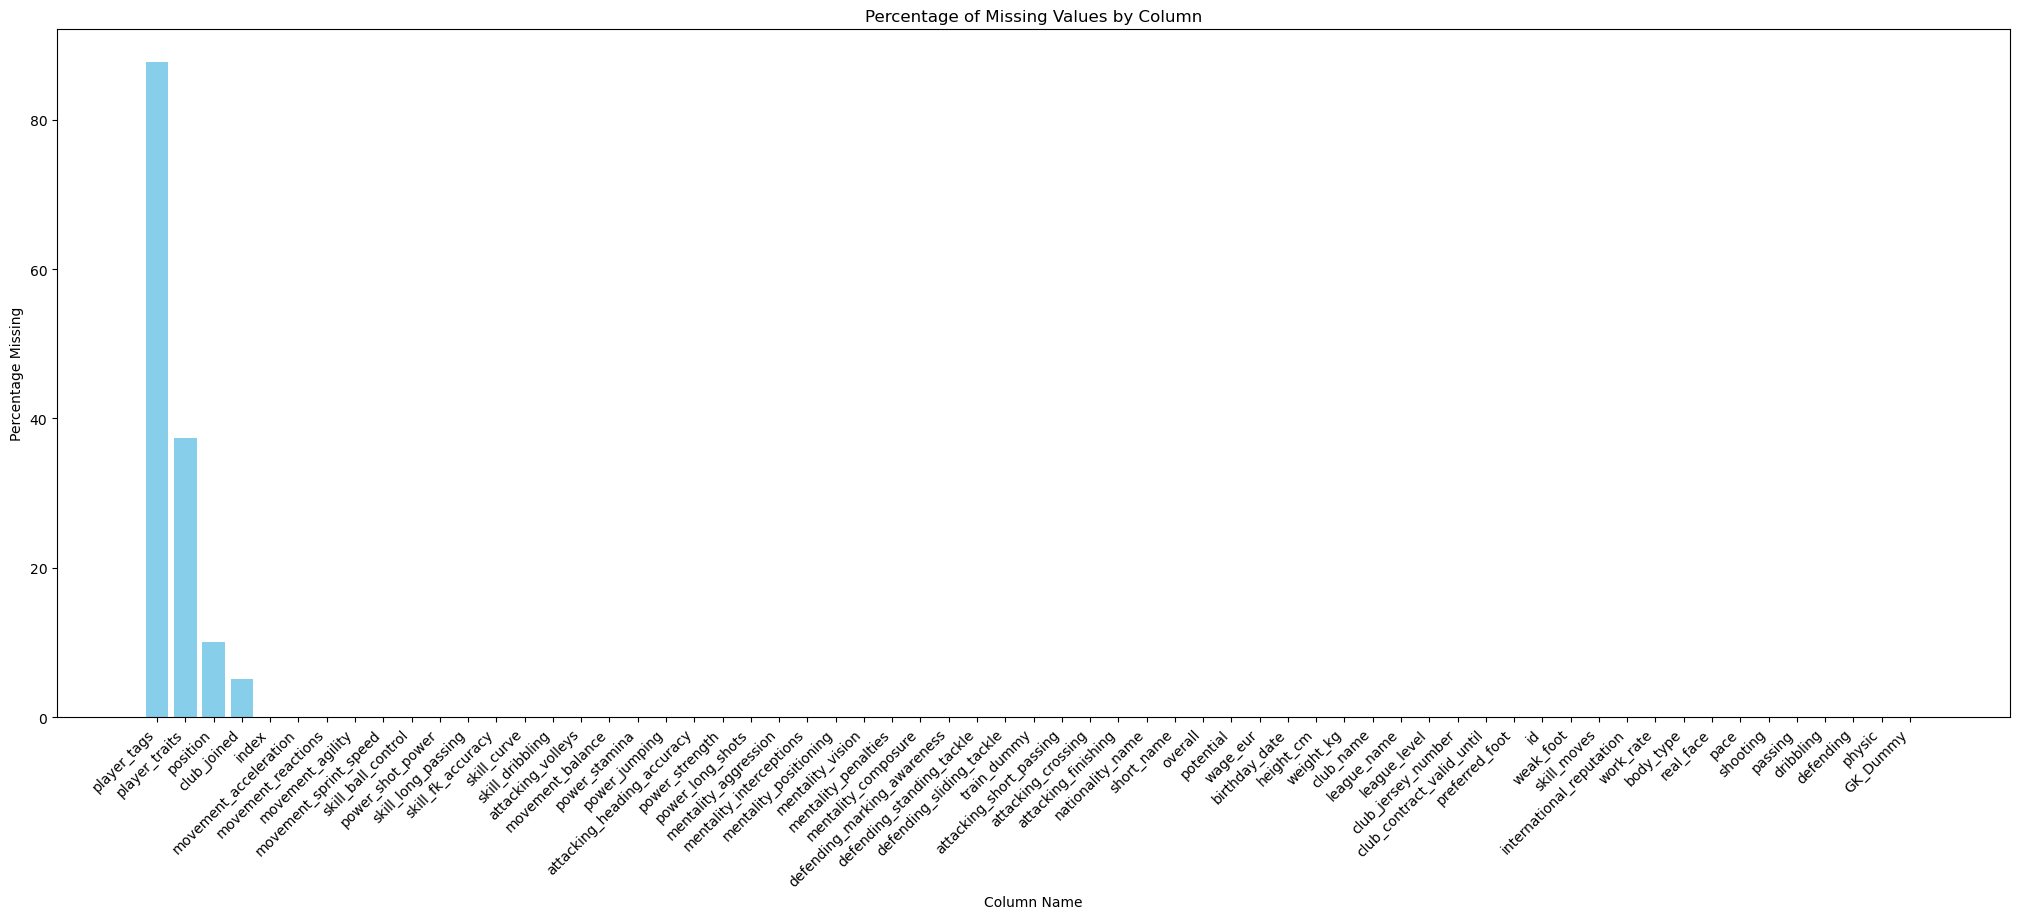


Columns with Missing Values (Descending Order):
player_tags: 87.7% (Categorical)
player_traits: 37.37% (Categorical)
position: 10.01% (Categorical)
club_joined: 5.17% (Categorical)


In [67]:
# def drop_column_release_clause(df):
#     return df.drop(['release_clause_eur'], axis=1)

# df=drop_column_release_clause(df)

calculate_missing_info_print_only(df_without_gk)


I will deal with these later.

# Taking care of categorical variables

Categorical variables need to be taken in a serious consideration here and they can give us good tips about the position of the player.

We first want to list how many categorical variables we have and how many unique values we have from each one.

This is important to the question what type of treatment we will do for each value.

In [68]:
calculate_column_statistics_for_categorical_variables(df_without_gk)

Total number of columns: 63
Number of categorical columns: 13


,Variable,Number of Unique Values,Top 5 Most Frequent Values
0,short_name,6752,"[J. Rodríguez, J. Brown, Danilo, L. Rodríguez, M. Camara]"
1,birthday_date,3959,"[1992-02-29, 1996-02-29, 2000-02-29, 1988-02-29, 1991-01-08]"
2,club_joined,1270,"[2021-07-01, 2019-07-01, 2018-07-01, 2017-07-01, 2020-07-01]"
3,player_traits,741,"[Speed Dribbler (AI), Power Header, Dives Into Tackles (AI), Long Shot Taker (AI), Long Passer (..."
4,club_name,701,"[Vissel Kobe, Raków Częstochowa, F.C. Hansa Rostock, Cracovia, FC St. Pauli]"
5,nationality_name,144,"[England, Brazil, Germany, Spain, Argentina]"
6,player_tags,64,"[#Strength, #Engine, #Acrobat, #Speedster, #Aerial Threat, #Strength]"
7,league_name,55,"[USA Major League Soccer, Argentina Primera División, English League Championship, English Leagu..."
8,position,23,"[LCB, RCB, RB, LB, ST]"
9,body_type,10,"[Normal (170-185), Lean (170-185), Normal (185+), Lean (185+), Normal (170-)]"


The categorical variable birthday_date could be interesting regarding the age of the player. We therefore encode it to a numerical variable birth_date.

In [69]:
# Convert 'birthday' to datetime format
df_without_gk['birthday_date'] = pd.to_datetime(df_without_gk['birthday_date'])

# Extract the year and create a new 'year_born' column
df_without_gk['year_born'] = df_without_gk['birthday_date'].dt.year

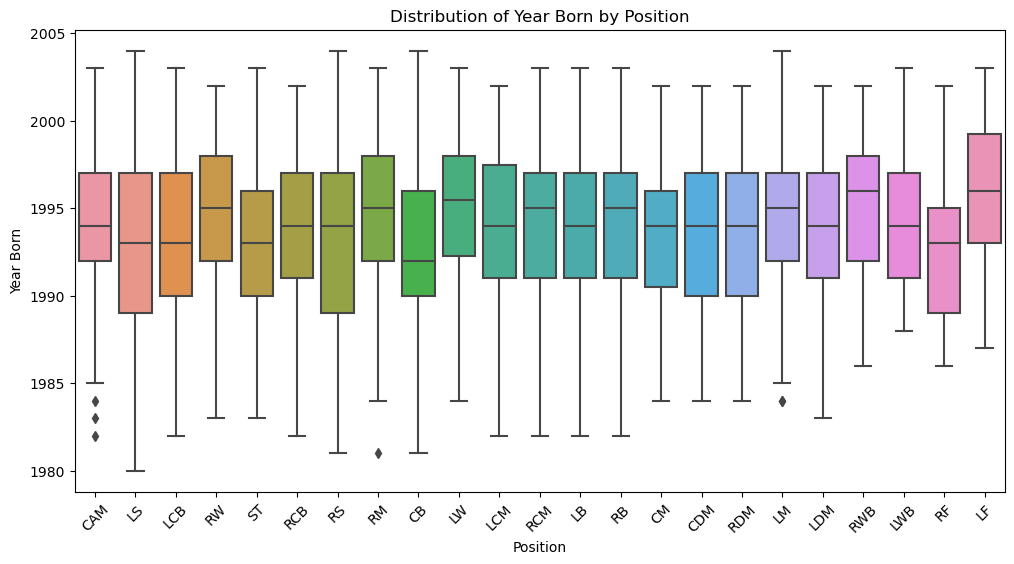

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='position', y='year_born', data=df_without_gk)

plt.title('Distribution of Year Born by Position')
plt.xlabel('Position')
plt.ylabel('Year Born')
plt.xticks(rotation=45) # Rotate the x labels if they are crowded
plt.show()

The distribution of birth years across positions seems relatively consistent, with the medians clustered around the late 1990s. There are no significant visual differences suggesting a strong correlation between the position and the year born, as the median lines are relatively at the same level across positions. However, there are slight variations in the spread and outliers for different positions.

To investigate the influence of categorical variables on player positions, you can apply the Chi-Square Test of Independence. 

Null Hypothesis is that both variables are not correlated.If the p-value is below a significance level (e.g., 0.05), you may reject the null hypothesis, indicating a significant association between the two variables.

Function to check whether categorical variables have impact on position

In [71]:
def chi_square_test(variables):
    for i in variables:
        contingency_table = pd.crosstab(df_without_gk[i], df_without_gk['position'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square Value of {i}: {chi2}")
        print(f"P-value of {i}: {p}")
        if p < 0.05:
            print(f'Because of the low p-value we can reject the null hypothesis. Therefore we can say that {i} has an impact on the position and we should keep the column and encode it.')
        else:
            print(f'The very high p-value means that we cannot reject the null hypothesis and therefore have high evidence that {i} has no effect on position. We therefore drop the column')    
        print()

In [72]:
chi_square_test(df_without_gk[['club_joined', 'short_name','player_traits', 'club_name', 'nationality_name', 'player_tags', 'league_name', 'body_type', 'work_rate', 'preferred_foot', 'real_face']])

Chi-Square Value of club_joined: 26397.12179318958
P-value of club_joined: 0.5038397269259839
The very high p-value means that we cannot reject the null hypothesis and therefore have high evidence that club_joined has no effect on position. We therefore drop the column

Chi-Square Value of short_name: 134087.77886574846
P-value of short_name: 0.4005452662420433
The very high p-value means that we cannot reject the null hypothesis and therefore have high evidence that short_name has no effect on position. We therefore drop the column

Chi-Square Value of player_traits: 20208.188545709403
P-value of player_traits: 2.875924981882893e-147
Because of the low p-value we can reject the null hypothesis. Therefore we can say that player_traits has an impact on the position and we should keep the column and encode it.

Chi-Square Value of club_name: 9842.133175374396
P-value of club_name: 1.0
The very high p-value means that we cannot reject the null hypothesis and therefore have high evidence t

Findings:

Club Joined Date ('club_joined'):
The date a player joined their current club is not a significant predictor of their playing position. This makes sense because a player's tenure at a club is generally unrelated to the specific skills and roles required for different positions on the field.

Player's Short Name ('short_name'):
As expected, a player’s short name has no bearing on their playing position. This is logical because a name is simply an identifier and does not reflect a player's abilities or the position they are suited for in the game.

Club Name ('club_name'):
The club a player is associated with does not significantly impact their playing position. This finding is intuitive as every football club is composed of players covering all positions, so the name of the club does not indicate a player's specific role.

In [73]:
columns_to_drop = ["club_joined",'short_name', 'club_name']

# Drop the specified columns
df_without_gk.drop(columns=columns_to_drop, inplace=True)

As we've observed, we're dealing with two binary variables, which means we can represent them using binary encoding: assigning 1 when one particular value is taken and 0 otherwise.

In [74]:
def encode_binary_categorical_and_drop_originals(df):
    if 'preferred_foot' in df.columns:
        df['preferred_foot'] = df['preferred_foot'].map({'Left': 0, 'Right': 1})
        print("preferred_foot: 'Left' is encoded as 0, 'Right' is encoded as 1")
    
    if 'real_face' in df.columns:
        df['real_face'] = df['real_face'].map({'No': 0, 'Yes': 1})
        print("real_face: 'No' is encoded as 0, 'Yes' is encoded as 1")

    return df
df_without_gk=encode_binary_categorical_and_drop_originals(df_without_gk)

preferred_foot: 'Left' is encoded as 0, 'Right' is encoded as 1
real_face: 'No' is encoded as 0, 'Yes' is encoded as 1


In [75]:
print(df_without_gk.columns)

Index(['index', 'id', 'overall', 'potential', 'wage_eur', 'birthday_date',
       'height_cm', 'weight_kg', 'league_name', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_name',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'player_tags', 'player_traits', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality

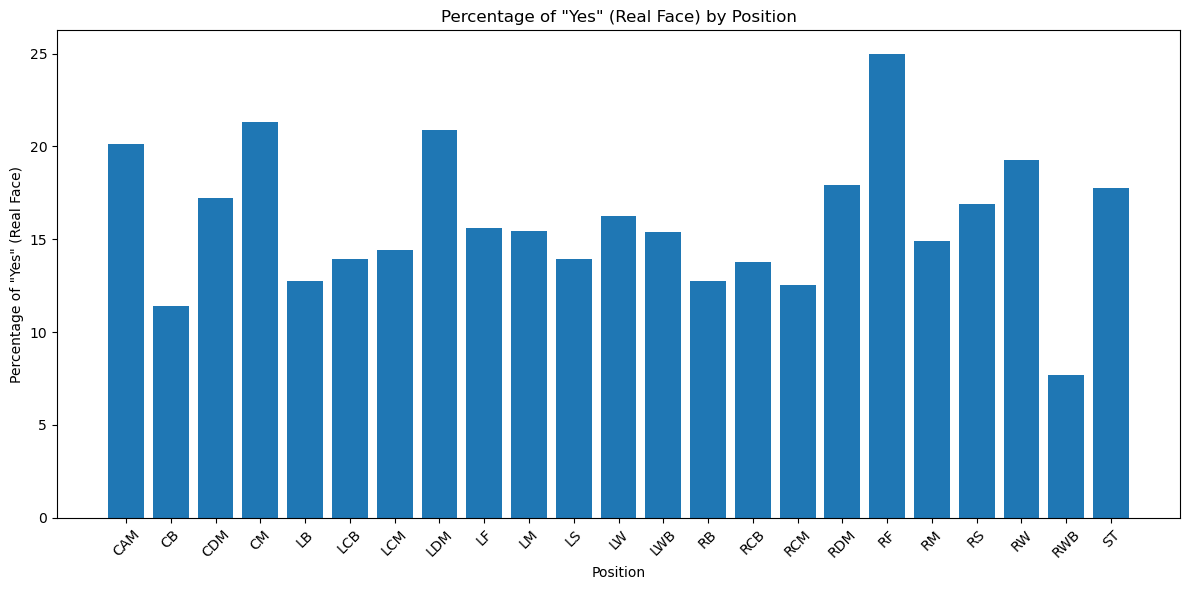

In [76]:
# Group by 'position'
grouped = df_without_gk.groupby('position')

# Calculate the proportion of 'Yes' for each group
proportions = grouped['real_face'].mean() * 100  # Multiply by 100 to get percentages

# Reset the index to make it a DataFrame
proportions_df = proportions.reset_index()

# Rename the column to 'real_face_proportion'
proportions_df = proportions_df.rename(columns={'real_face': 'real_face_proportion'})

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(
    proportions_df['position'],
    proportions_df['real_face_proportion'],
)

plt.xlabel('Position')
plt.ylabel('Percentage of "Yes" (Real Face)')
plt.title('Percentage of "Yes" (Real Face) by Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There seem to be some position that have a higher degree of real face than another, so this variable may indicate something. The rational behind could be the prominence of the position or the popularity of players in that role.

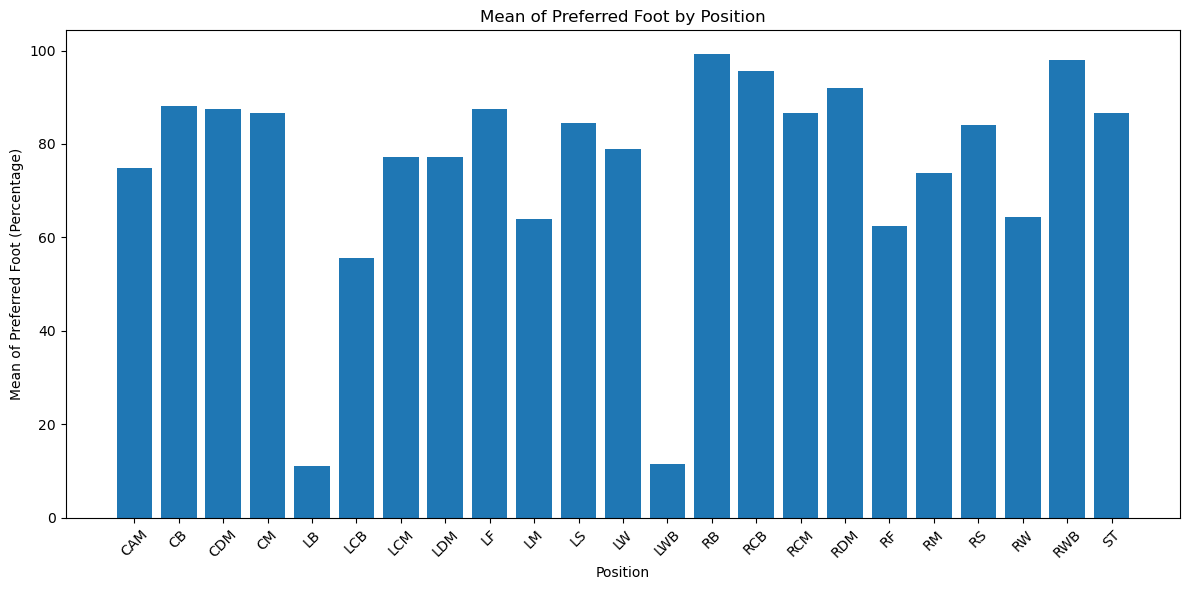

In [77]:

# Group by 'position' and calculate the mean of 'preferred_foot_encoded'
mean_preferred_foot = df_without_gk.groupby('position')['preferred_foot'].mean() * 100  # Multiply by 100 to get percentages

# Reset the index to make it a DataFrame
mean_preferred_foot_df = mean_preferred_foot.reset_index()

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(
    mean_preferred_foot_df['position'],
    mean_preferred_foot_df['preferred_foot'],
)

plt.xlabel('Position')
plt.ylabel('Mean of Preferred Foot (Percentage)')
plt.title('Mean of Preferred Foot by Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

By examining the graph, it becomes evident that there is diversity among the data, and certain positions show a notable relevance for players with a left prefered foot. This becomes apparent as the mean value approaches 0, indicating fewer instances with a value of 1 and a higher presence of left prefered foot players in those positions.

In essence, this suggests that the preferred foot variable is more likely to influence the player's position compared to the real_face variable.

Now, I am going to encode, nationality name, league name.

In [78]:
def encode_specific_variables_league_nationality(df):
    # Ordinal encoding for 'nationality_name' and 'league_name'
    encoder = OrdinalEncoder()
    df['nationality_name'] = encoder.fit_transform(df[['nationality_name']])
    df['league_name'] = encoder.fit_transform(df[['league_name']])

    return df

# Applying the function to the DataFrame
df_without_gk = encode_specific_variables_league_nationality(df_without_gk)

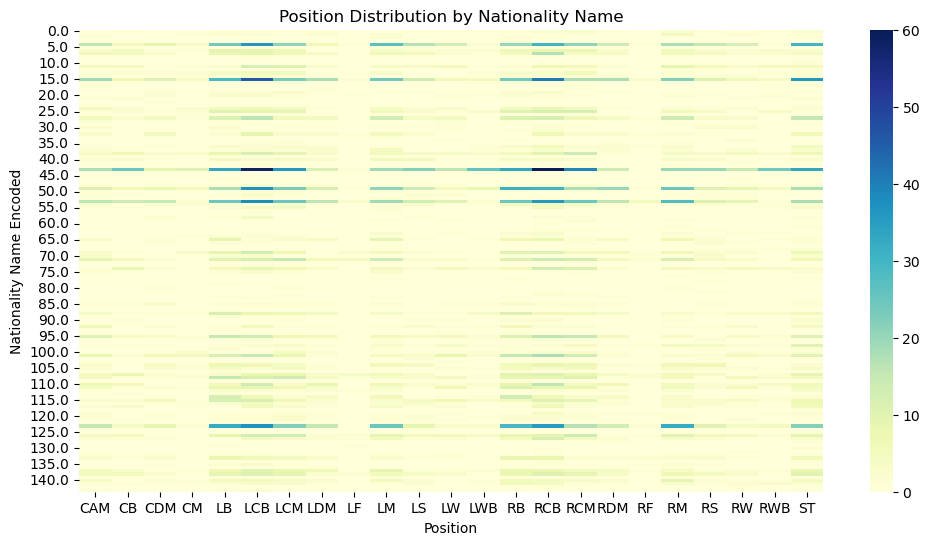

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to calculate the counts of positions by nationality name
pivot_table = df_without_gk.pivot_table(index='nationality_name', columns='position', aggfunc='size', fill_value=0)

# Create a heatmap for position distribution by nationality name
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)
plt.title('Position Distribution by Nationality Name')
plt.xlabel('Position')
plt.ylabel('Nationality Name Encoded')
plt.show()

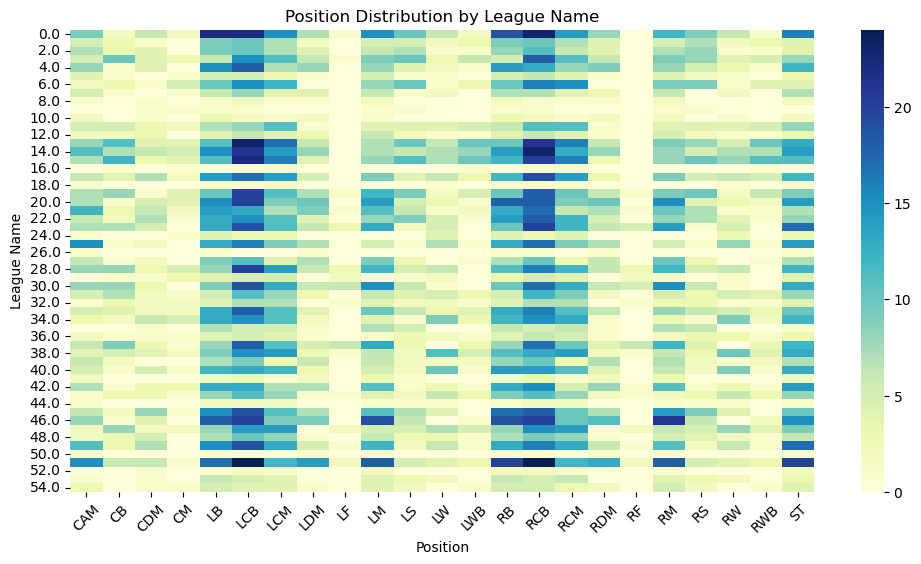

In [80]:
# Create a pivot table to calculate the counts of positions by league name
pivot_table_league = df_without_gk.pivot_table(index='league_name', columns='position', aggfunc='size', fill_value=0)

# Create a heatmap for position distribution by league name
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_league, cmap='YlGnBu', annot=False)
plt.title('Position Distribution by League Name')
plt.xlabel('Position')
plt.ylabel('League Name')
plt.xticks(rotation=45)  # Rotate position labels if necessary
plt.yticks(rotation=0)   # Ensure league names are horizontal for readability
plt.show()

There are a few darker horizontal lines indicating certain nationalities have a higher count of players across various positions. This could imply that these nationalities are more common within the dataset. Additionally, some positions like CM, CB, and ST show a broader range of darker shades across different nationalities, suggesting these positions are more commonly represented across the dataset's nationalities.

Compared to the previous heatmap based on nationalities, this one suggests that the distribution of positions varies more noticeably across different leagues than it does across nationalities. There are pronounced dark patches that indicate certain positions are particularly prevalent in specific leagues. For example, you can see that some leagues (represented by certain numbers on the Y-axis) have a higher concentration of players in central positions like CM and CDM, while others show a spread across more varied positions.

Both heatmaps are useful for identifying potential patterns of player positions within the categories of nationality and league. However, the league-based heatmap seems to display more distinct variations between the different categories, suggesting that the league a player is in may have a more pronounced impact on the distribution of positions compared to the player's nationality. This could be due to various factors such as the tactical preferences of leagues, the training and development focus in different regions, or recruitment strategies of clubs within the leagues.

In [81]:
def one_hot_encode_with_initials_and_group(df):
    # Apply one-hot encoding and keep the original columns
    work_rate_dummies = pd.get_dummies(df['work_rate'], prefix='work_rate')
    body_type_dummies = pd.get_dummies(df['body_type'], prefix='body_type')

    # Generate new column names by taking the initials of the categorical values
    work_rate_dummies.columns = ['work_rate_' + ''.join([word[0] for word in category.split()]) for category in work_rate_dummies.columns]
    body_type_dummies.columns = ['body_type_' + ''.join([word[0] for word in category.split()]) for category in body_type_dummies.columns]

    # Concatenate the new dummy DataFrames with the original DataFrame
    df = pd.concat([df, work_rate_dummies, body_type_dummies], axis=1)
    
    # Create groups for the new one-hot encoded columns
    work_rate_columns = list(work_rate_dummies.columns)
    body_type_columns = list(body_type_dummies.columns)
    
    # Return the updated DataFrame and the column groups
    return df, work_rate_columns, body_type_columns

df_without_gk, work_rate_columns, body_type_columns = one_hot_encode_with_initials_and_group(df_without_gk)


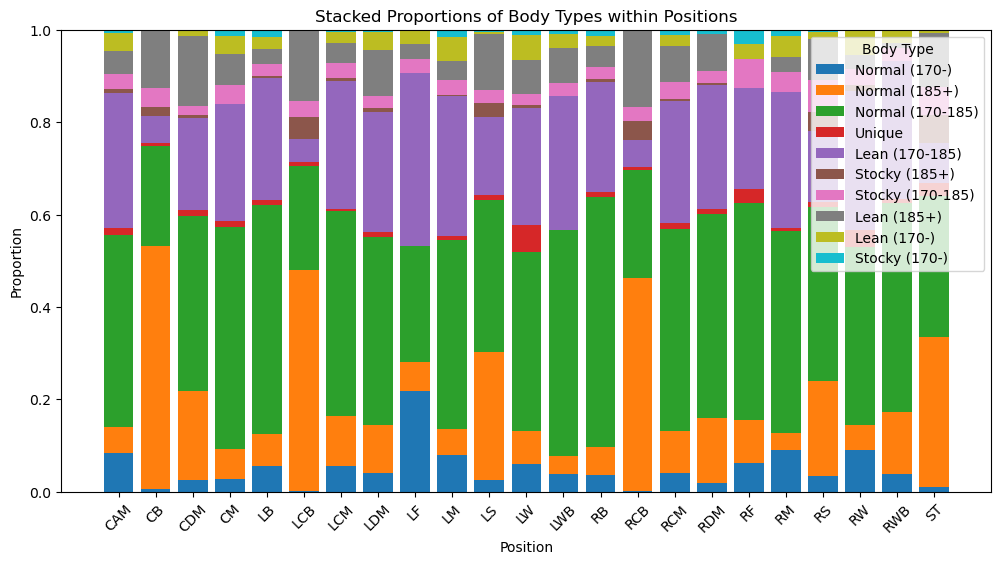

In [82]:


# Assuming you already have body_type_proportions calculated as you mentioned
# body_type_proportions = body_type_counts.divide(body_type_counts.sum(axis=1), axis=0)
# Calculate the count of each work rate within each position
body_type_counts = df_without_gk.groupby('position')['body_type'].value_counts().unstack(fill_value=0)

# Convert counts to proportions
body_type_proportions = body_type_counts.divide(body_type_counts.sum(axis=1), axis=0)
# Get the list of unique body types
unique_body_types = df_without_gk['body_type'].unique()

# Create a dictionary to store data for each body type
data_dict = {body_type: body_type_proportions[body_type] for body_type in unique_body_types}

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
bottom = None  # Variable to keep track of the bottom values for stacking

for body_type in unique_body_types:
    plt.bar(body_type_proportions.index, data_dict[body_type], label=body_type, bottom=bottom)
    if bottom is None:
        bottom = data_dict[body_type]
    else:
        bottom += data_dict[body_type]

# Customize the plot
plt.xlabel('Position')
plt.ylabel('Proportion')
plt.title('Stacked Proportions of Body Types within Positions')
plt.xticks(rotation=45)
plt.legend(title='Body Type', loc='upper right')

# Show the plot
plt.show()


The chart indicates that the "Normal (185+)" body type is prominently represented in the Central Back, Left Central Back, and Right Central Back positions. This suggests that having a taller stature, as implied by the "Normal (185+)" classification, could be an important characteristic for players occupying central defensive roles.

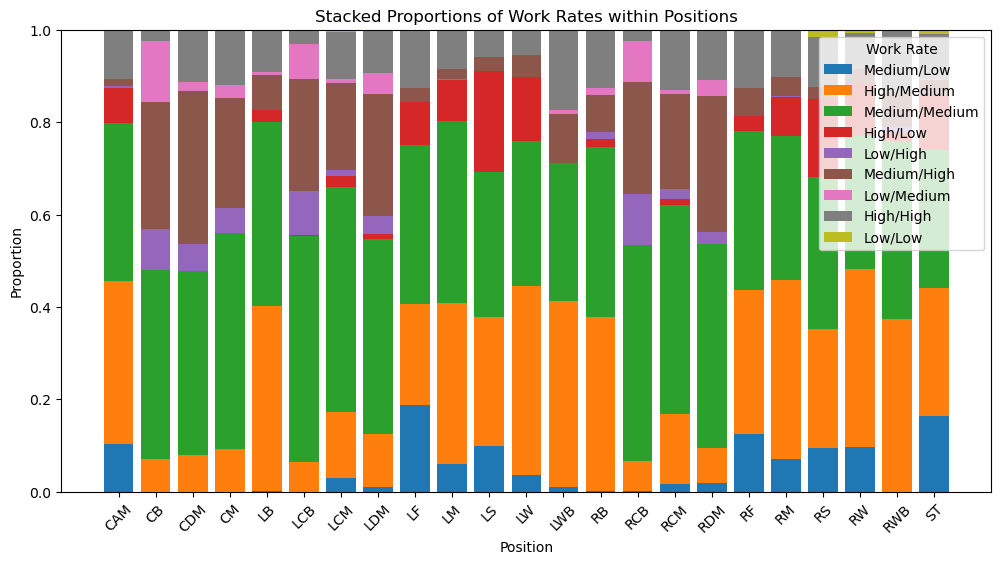

In [83]:

# Calculate the count of each work rate within each position
work_rate_counts = df_without_gk.groupby('position')['work_rate'].value_counts().unstack(fill_value=0)

# Convert counts to proportions
work_rate_proportions = work_rate_counts.divide(work_rate_counts.sum(axis=1), axis=0)

# Get the list of unique work rates
unique_work_rates = df_without_gk['work_rate'].unique()

# Create a dictionary to store data for each work rate
data_dict = {work_rate: work_rate_proportions[work_rate] for work_rate in unique_work_rates}

# Create a stacked bar chart for work rates
plt.figure(figsize=(12, 6))
bottom = None  # Variable to keep track of the bottom values for stacking

for work_rate in unique_work_rates:
    plt.bar(work_rate_proportions.index, data_dict[work_rate], label=work_rate, bottom=bottom)
    if bottom is None:
        bottom = data_dict[work_rate]
    else:
        bottom += data_dict[work_rate]

# Customize the plot
plt.xlabel('Position')
plt.ylabel('Proportion')
plt.title('Stacked Proportions of Work Rates within Positions')
plt.xticks(rotation=45)
plt.legend(title='Work Rate', loc='upper right')

# Show the plot
plt.show()

From these observations, it seems that work rate is an important attribute that varies by position. The prevalence of "High" work rates in more dynamic positions (such as wide players and fullbacks) reflects the physical demands of those roles. Conversely, the presence of "Medium" and "Low" work rates in attacking positions suggests a focus on offensive output over defensive duties.

In [92]:
calculate_column_statistics_for_categorical_variables(df_without_gk)

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming all categorical variables are encoded and `df_without_gk` is ready
# Normalize the feature data
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_without_gk.drop('position', axis=1))

# Use PCA for dimensionality reduction for visualization purposes
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized)

# Choose the number of clusters with the Elbow method or another method
# For demonstration, let's say we decide on k clusters
k = 5  # Example number of clusters

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_normalized)

# Add the cluster information back to the original DataFrame
df_without_gk['cluster'] = clusters

# Visualize the clusters in the PCA-reduced space
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Player Clusters after PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()

# Analyze the clusters
# This is a simple example to get the counts of positions in each cluster
for i in range(k):
    print(f"Cluster {i}:")
    print(df_without_gk[df_without_gk['cluster'] == i]['position'].value_counts())
    print("\n")





NameError: name 'df_without_gk' is not defined

In [97]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame named df_without_gk with "player_tags" and "position" columns

# Create a contingency table
contingency_table = pd.crosstab(df_without_gk['player_tags'], df_without_gk['position'])
print(contingency_table)


# Create a contingency table for player tags vs. position
contingency_table_tags = pd.crosstab(df_without_gk['player_tags'], df_without_gk['position'])

# Perform the chi-squared test for player tags vs. position
chi2_tags, p_tags, _, _ = chi2_contingency(contingency_table_tags)

# Calculate Cramér's V for player tags vs. position
n_tags = contingency_table_tags.sum().sum()  # Total number of observations
min_dim_tags = min(contingency_table_tags.shape) - 1  # Minimum of the number of categories in rows or columns
cramers_v_tags = np.sqrt(chi2_tags / (n_tags * min_dim_tags))

print(f"Cramér's V for player tags vs. position: {cramers_v_tags}")


position                                                                  CAM  \
player_tags                                                                     
#Acrobat                                                                   14   
#Acrobat, #Clinical Finisher                                                0   
#Aerial Threat                                                              0   
#Aerial Threat, #Clinical Finisher, #Complete Forward                       0   
#Aerial Threat, #Distance Shooter, #Clinical Finisher, #Complete Forward    0   
...                                                                       ...   
#Tackling, #Tactician, #Strength, #Complete Defender                        0   
#Tackling, #Tactician                                                       0   
#Tackling                                                                   0   
#Tactician, #Strength                                                       0   
#Tactician                  

In [101]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame named df_without_gk with "player_traits" and "position" columns

# Create a contingency table for player traits vs. position
contingency_table_traits = pd.crosstab(df_without_gk['player_traits'], df_without_gk['position'])
print(contingency_table_traits)

# Create a contingency table for player traits vs. position
contingency_table_traits = pd.crosstab(df_without_gk['player_traits'], df_without_gk['position'])

# Perform the chi-squared test for player traits vs. position
chi2_traits, p_traits, _, _ = chi2_contingency(contingency_table_traits)

# Calculate Cramér's V for player traits vs. position
n_traits = contingency_table_traits.sum().sum()  # Total number of observations
min_dim_traits = min(contingency_table_traits.shape) - 1  # Minimum of the number of categories in rows or columns
cramers_v_traits = np.sqrt(chi2_traits / (n_traits * min_dim_traits))

print(f"Cramér's V for player traits vs. position: {cramers_v_traits}")


position                                                     CAM  CB  CDM  CM  \
player_traits                                                                   
Chip Shot (AI)                                                 0   0    0   0   
Dives Into Tackles (AI)                                        2   9   14   3   
Dives Into Tackles (AI), Early Crosser                         0   0    0   0   
Dives Into Tackles (AI), Early Crosser, Long Passer (AI)       0   0    0   0   
Dives Into Tackles (AI), Early Crosser, Speed Dribbler (AI)    0   0    0   0   
...                                                          ...  ..  ...  ..   
Speed Dribbler (AI), Team Player                               0   0    0   0   
Speed Dribbler (AI), Technical Dribbler (AI)                   2   0    0   0   
Team Player                                                    1   4    6   1   
Team Player, Technical Dribbler (AI)                           0   0    0   0   
Technical Dribbler (AI)     

The Cramér's V values of 0.35 for player tags and 0.48 for player traits indicate a moderate to moderately strong association with 34 different player positions. Player traits have a slightly stronger relationship with player positions than player tags. However, neither of these values suggests a very strong or definitive predictive power. 

Done, lets go to test

# Final Check up before testing

In [93]:
calculate_column_statistics_for_categorical_variables(df_without_gk)

index                         int64
id                            int64
short_name                   object
overall                       int64
potential                     int64
                              ...  
defending_standing_tackle     int64
defending_sliding_tackle      int64
position                     object
train_dummy                   int64
GK_Dummy                      int64
Length: 67, dtype: object


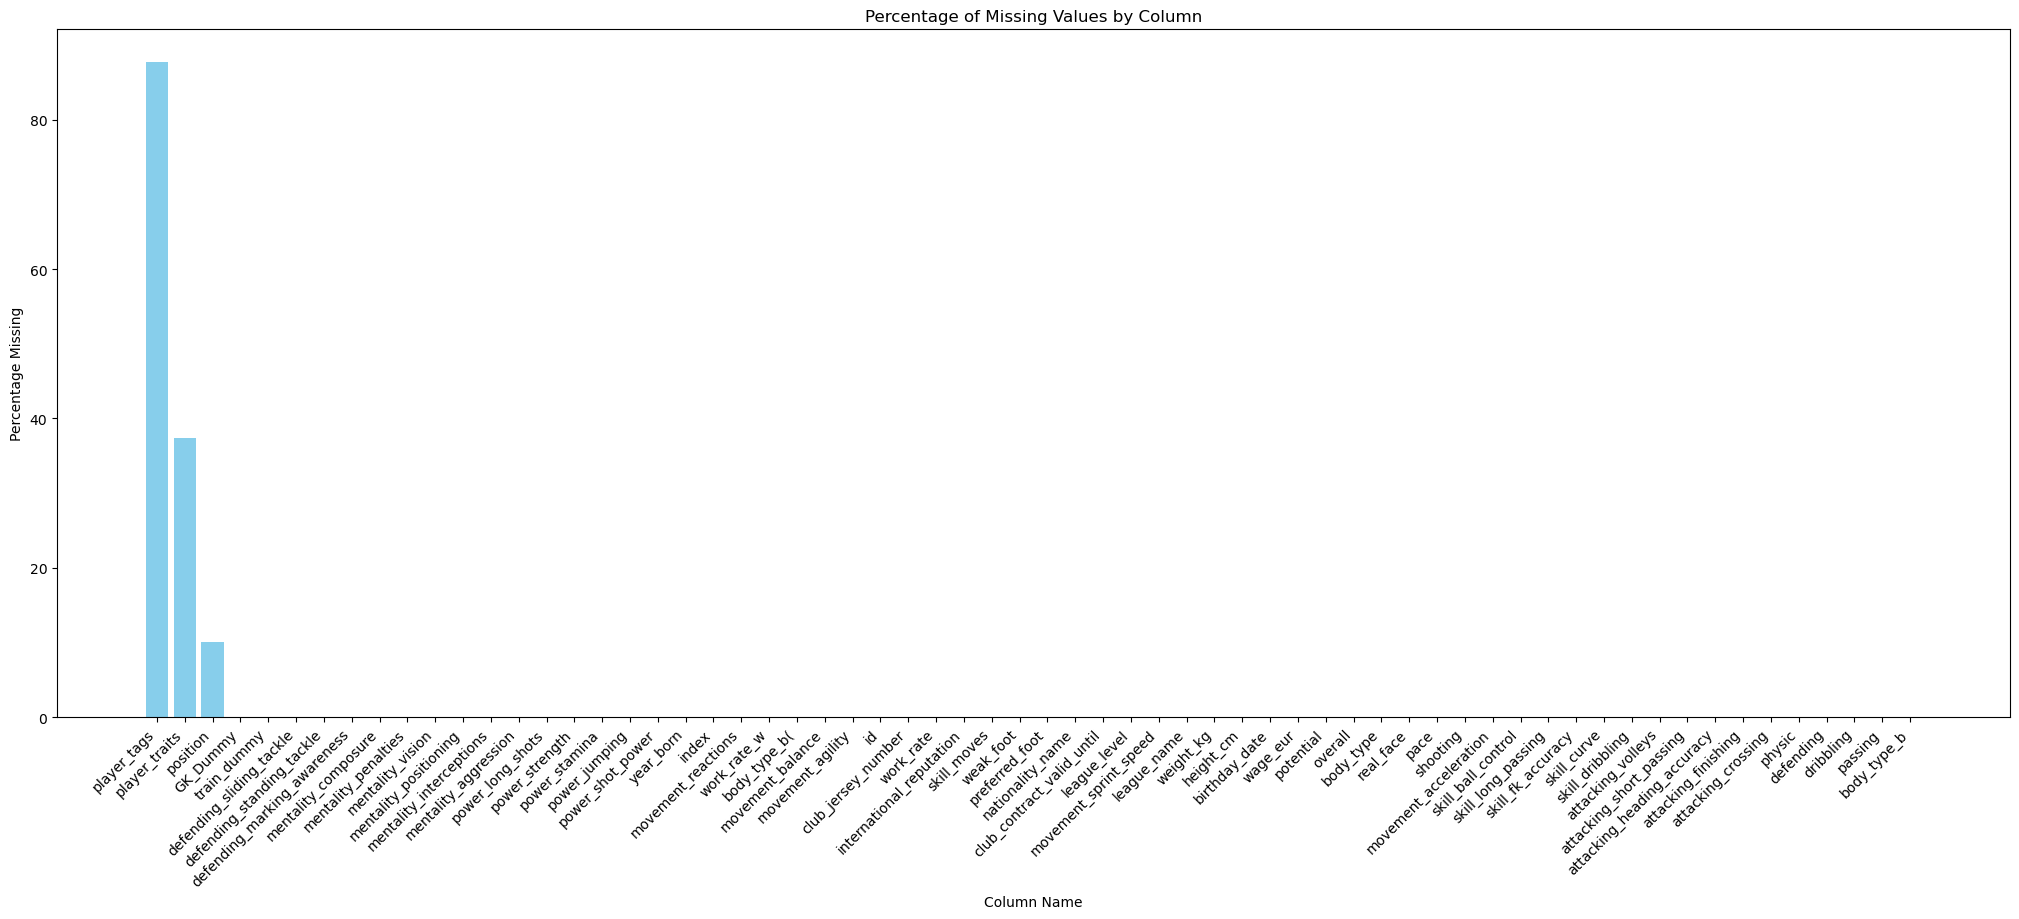


Columns with Missing Values (Descending Order):
player_tags: 87.7% (Categorical)
player_traits: 37.37% (Categorical)
position: 10.01% (Categorical)


In [87]:
calculate_missing_info_print_only(df_without_gk)


don't know yet how to deal with player_tags and player_traits..... Ignore them first

In [363]:
def list_numerical_columns_horizontally_with_quotes(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numerical_columns_with_quotes = ', '.join([f'"{col}"' for col in numerical_columns])
    return numerical_columns_with_quotes

list_numerical_columns_horizontally_with_quotes(df_without_gk)

'"index", "id", "overall", "potential", "wage_eur", "height_cm", "weight_kg", "league_level", "club_jersey_number", "club_contract_valid_until", "weak_foot", "skill_moves", "international_reputation", "pace", "shooting", "passing", "dribbling", "defending", "physic", "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed", "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping", "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure", "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle", "train_dummy", "GK_Dummy", "year_born", "preferred_foot_encoded", "real_face

### Separating the dfs for training and testing

In [364]:
"""From the numerical I will drop id, club_jersey_number and club_contract_valid_until"""
# Seperating test and train
X_train = df_without_gk[df_without_gk['train_dummy'] == 1][["overall", "potential", "wage_eur", "height_cm", "weight_kg", "league_level", "weak_foot", "skill_moves", "international_reputation", "pace", "shooting", "passing", "dribbling", "defending", "physic", "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed", "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping", "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure", "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle", "train_dummy", "preferred_foot_encoded", "real_face_encoded", "nationality_name_encoded", "league_name_encoded", "body_type_encoded", "work_rate_encoded"]]
y_train = df_without_gk[df_without_gk['train_dummy'] == 1][['position']]

X_test = df_without_gk[df_without_gk['train_dummy'] == 0][["overall", "potential", "wage_eur", "height_cm", "weight_kg", "league_level", "weak_foot", "skill_moves", "international_reputation", "pace", "shooting", "passing", "dribbling", "defending", "physic", "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed", "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping", "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure", "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle", "train_dummy", "preferred_foot_encoded", "real_face_encoded", "nationality_name_encoded", "league_name_encoded", "body_type_encoded", "work_rate_encoded"]]

# **Classification - Prediction**

In [270]:
# Training the Random Forest Classifier
model = RandomForestClassifier(random_state=123)
model.fit(X_train, y_train)

# Making predictions for test_dataset
y_test_predicted = model.predict(X_test)

# Filling in the missing 'position' values in test_dataset
pred_df = pd.DataFrame()
pred_df['id'] = df_without_gk[df_without_gk['train_dummy'] == 0]['id']
pred_df['pred'] = y_test_predicted



In [370]:
###TESTING THE Gradient boosting classifier to verify the score on kaggle###

#Gb = GradientBoostingClassifier(random_state=123, n_estimators=100, learning_rate=0.1, max_depth=3, max_features='sqrt')
# Training the Random Forest Classifier
model = GradientBoostingClassifier(random_state=123, n_estimators=110, learning_rate=0.1, max_depth=3, max_features='sqrt')    #n_estimators = number of trees

model.fit(X_train, y_train)

# Making predictions for test_dataset
y_test_predicted = model.predict(X_test)

# Filling in the missing 'position' values in test_dataset
pred_df = pd.DataFrame()
pred_df['id'] = df_without_gk[df_without_gk['train_dummy'] == 0]['id']
pred_df['pred'] = y_test_predicted

# Cross Validation

### Cross Validation for **Random Forest**

Find the best hyperparameter (around 30 mins to run)

In [302]:
Rf = RandomForestClassifier(random_state=123)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],   # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at leaf nodes
    'max_features': ['sqrt', 'log2']  # Number of features to consider for split
}

# Perform GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=Rf, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Latest F1 score:

KeyboardInterrupt: 

In [228]:
# Creating the Random Forest Classifier model
Rf = RandomForestClassifier(random_state=123, n_estimators=110, max_depth= None ,min_samples_split=10, min_samples_leaf=4 ,max_features='sqrt', bootstrap=True)

# Calculating the accuracy, precision, recall, and F1-score for each fold
#Rf_accuracy_scores = cross_val_score(Rf, X_train, y_train, cv=5, scoring='accuracy')
#Rf_precision_scores = cross_val_score(Rf, X_train, y_train, cv=5, scoring='precision_macro')
#Rf_recall_scores = cross_val_score(Rf, X_train, y_train, cv=5, scoring='recall_macro')
Rf_f1_scores = cross_val_score(Rf, X_train, y_train, cv=5, scoring='f1_macro')

# Printing the mean and standard deviation of each metric
#print("Mean accuracy score:", Rf_accuracy_scores.mean())
#print("Mean precision score:", Rf_precision_scores.mean())
#print("Mean recall score:", Rf_recall_scores.mean())
print("Mean F1 score:", Rf_f1_scores.mean())
#print("Standard deviation of F1 score:", Rf_f1_scores.std())



Mean F1 score: 0.1996947398272638
Standard deviation of F1 score: 0.01013429787360721


### Cross Validation for **Gradient Boosting Classifier**

Find the best hyperparameter for GBC (around 4 hours to run)

In [311]:
gb = GradientBoostingClassifier(random_state=123)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],   # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at leaf nodes
    'max_features': ['sqrt', 'log2']  # Number of features to consider for split
}

# Perform GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



KeyboardInterrupt: 

In [369]:
# Creating the Gradient Boosting Classifier model
Gb = GradientBoostingClassifier(random_state=123, n_estimators=110, learning_rate=0.1, max_depth=3, max_features='sqrt')    #n_estimators = number of trees
    #learning_rate = how much each tree is allowed to correct the mistakes of the previous trees
    #max_depth = how many splits each tree is allowed to make
    
# Calculating the accuracy, precision, recall, and F1-score for each fold
#Gb_accuracy_scores = cross_val_score(Gb, X_train, y_train, cv=5, scoring='accuracy')
#Gb_precision_scores = cross_val_score(Gb, X_train, y_train, cv=5, scoring='precision_macro')
#Gb_recall_scores = cross_val_score(Gb, X_train, y_train, cv=5, scoring='recall_macro')
Gb_f1_scores = cross_val_score(Gb, X_train, y_train, cv=5, scoring='f1_macro')

# Printing the mean and standard deviation of each metric
#print("Mean accuracy score:", Gb_accuracy_scores.mean())
#print("Mean precision score:", Gb_precision_scores.mean())
#print("Mean recall score:", Gb_recall_scores.mean())
print("Mean F1 score:", Gb_f1_scores.mean())
#print("Standard deviation of F1 score:", Gb_f1_scores.std())

# Latest F1 score: 0.21756532303012385

Mean F1 score: 0.21700098213398503


### Cross Validation for **Logistic Regression**

In [303]:
# Creating the Logistic Regression model
Lr = LogisticRegression(random_state=123)

# Calculating the accuracy, precision, recall, and F1-score for each fold
#Lr_accuracy_scores = cross_val_score(Lr, X_train, y_train, cv=5, scoring='accuracy')
#Lr_precision_scores = cross_val_score(Lr, X_train, y_train, cv=5, scoring='precision_macro')
#Lr_recall_scores = cross_val_score(Lr, X_train, y_train, cv=5, scoring='recall_macro')
Lr_f1_scores = cross_val_score(Lr, X_train, y_train, cv=5, scoring='f1_macro')

# Printing the mean and standard deviation of each metric
#print("Mean accuracy score:", Lr_accuracy_scores.mean())
#print("Mean precision score:", Lr_precision_scores.mean())
#print("Mean recall score:", Lr_recall_scores.mean())
print("Mean F1 score:", Lr_f1_scores.mean())
#print("Standard deviation of F1 score:", Lr_f1_scores.std())

Mean F1 score: 0.05482816337246903


### Cross Validation for **Decision Tree Classifier**

Find the best hyperparameter for GBC (around 4 hours to run)

In [308]:
gb = DecisionTreeClassifier(random_state=123)

# Define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],      # Splitting criterion
    'max_depth': [None, 5, 10, 15],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10, 15],   # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4, 6],      # Minimum samples required at leaf nodes
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider for split
    'splitter': ['best', 'random']         # Strategy to choose the split at each node
}

# Perform GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 15, 'splitter': 'best'}


In [310]:
# Creating the Decision Tree model
Dt = DecisionTreeClassifier(random_state=123, criterion = "entropy", max_depth=None, min_samples_split=15, min_samples_leaf=4, max_features=None, splitter='best')
    # max_depth = hyperparameter that defines the maximum depth of the decision tree. (maximum number of levels that the tree can grow to during training.)
    # min_samples_split = hyperparameter that sets the minimum number of samples required to split an internal node. (node will only be split further if it contains at least 2 samples.)

# Calculating the accuracy, precision, recall, and F1-score for each fold
#Dt_accuracy_scores = cross_val_score(Dt, X_train, y_train, cv=5, scoring='accuracy')
#Dt_precision_scores = cross_val_score(Dt, X_train, y_train, cv=5, scoring='precision_macro')
#Dt_recall_scores = cross_val_score(Dt, X_train, y_train, cv=5, scoring='recall_macro')
Dt_f1_scores = cross_val_score(Dt, X_train, y_train, cv=5, scoring='f1_macro')

# Printing the mean and standard deviation of each metric
#print("Mean accuracy score:", Lr_accuracy_scores.mean())
#print("Mean precision score:", Lr_precision_scores.mean())
#print("Mean recall score:", Lr_recall_scores.mean())
print("Mean F1 score:", Dt_f1_scores.mean())
#print("Standard deviation of F1 score:", Lr_f1_scores.std())

#Latest F1 score: 0.19965866994086084

Mean F1 score: 0.19635100461126537


In [371]:
pred_df


,id,pred
26,115909,CAM
35,135537,RCB
44,140222,RCB
47,142499,RCM
59,145014,LDM
...,...,...
7620,263288,LM
7621,263291,RB
7635,263550,LCB
7645,263808,LM


Now we have the predictions for the non-goalkeepers. So, we have to add the ids of the goalkeepers with the prediction 'GK'

In [372]:
merged_df = pd.merge(pred_df, df_test, on='id', how='outer')

In [373]:
merged_df['pred'] = merged_df['pred'].fillna('GK')

In [374]:
merged_df

,id,pred,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,train_dummy
0,115909,CAM,Rubén Castro,69,69,NaN,3000,1981-06-27,169,68,...,36,12,14,14,8,15,8,12,NaN,0
1,135537,RCB,G. Tamaș,67,67,180000,2000,1983-11-09,188,85,...,68,66,65,12,8,13,7,7,NaN,0
2,140222,RCB,P. Da Silva,67,67,NaN,500,1980-02-01,180,76,...,70,67,64,9,8,15,16,9,NaN,0
3,142499,RCM,Aitor Sanz,70,70,325000,4000,1984-09-13,181,71,...,69,64,60,14,11,12,9,16,NaN,0
4,145014,LDM,Juande,67,67,350000,2000,1986-08-12,185,74,...,65,64,62,13,5,12,12,14,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,233154,GK,S. Takagi,66,66,425000,1000,1989-05-22,181,76,...,10,10,12,64,65,70,66,68,50,0
763,210257,GK,Ederson,89,91,94000000,200000,1993-08-17,188,86,...,29,15,8,87,82,93,88,88,64,0
764,208719,GK,P. Kühn,70,70,1100000,3000,1992-09-02,188,95,...,8,17,16,70,63,69,72,74,50,0
765,223175,GK,O. Kocuk,69,72,1400000,16000,1995-07-27,188,78,...,5,10,11,71,68,62,64,73,33,0


In [375]:
selected_columns = ['id', 'pred']
new_test_dataset = merged_df[selected_columns]

#export_data_path = 'C:/Users/vanes/Desktop/BSE/Term 1/Computational Machine Learning/Project_2/try_Vanessa.csv'
export_data_path = '/Users/mathieu26/Desktop/DSDM-BSE/Term 1/Computational Machine Learning/Project2/ML2_Les_Corts-1/Prediction.csv'
new_test_dataset.to_csv(export_data_path, index=False)

